<a href="https://colab.research.google.com/github/KhoaKD59/HomeworkW10_2023/blob/main/cifar_100_from_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #Để chuyển thành one hot encoding
from keras.models import load_model
import numpy as np
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [32]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

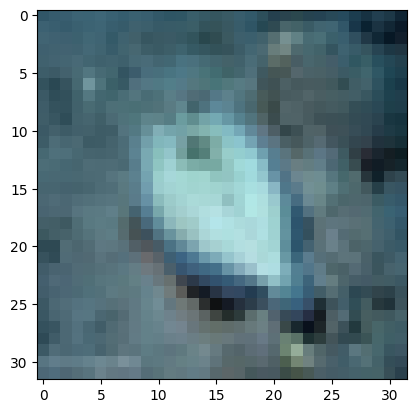

In [34]:

hinh = train_images[2222]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show

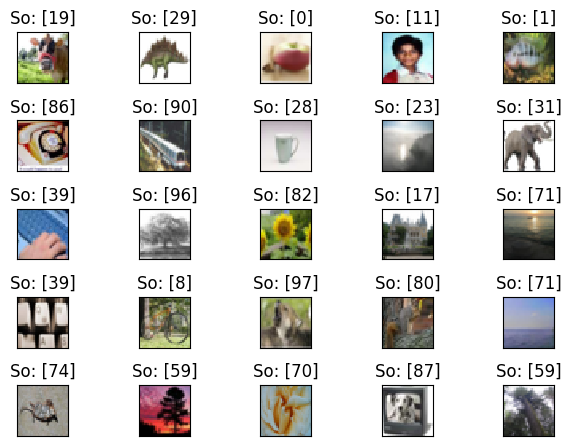

In [35]:
for i in range(25):
 plt.subplot(5,5, i+1)
 plt.tight_layout()
 plt.imshow(train_images[i], cmap ='gray', interpolation = 'none')
 plt.title('So: {}'.format(train_labels[i]))
 plt.xticks([])
 plt.yticks([])
 

In [36]:
model = Sequential() #Just like ANN
model.add(Dense(512, activation = 'relu',input_shape = (32*32*3,))) 
model.add(Dense(100,activation = 'softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [37]:
train_images = train_images.reshape((50000,32*32*3)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000, 32*32*3)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(50000, 3072)

In [38]:
from keras.utils import to_categorical #one hot encoding
train_labels = to_categorical(train_labels, 100) #One hot encoding
test_labels = to_categorical(test_labels, 100)
print(train_labels.shape)
print(test_labels.shape)

(50000, 100)
(10000, 100)


In [39]:
#Compile model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
#Fit model
model.fit(train_images, train_labels, epochs = 10, batch_size = 784)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy followed by the test folder:', test_acc*100)
print('Loss function', test_loss)

Epoch 1/10
64/64 [==============================] - 6s 89ms/step - loss: 4.6574 - accuracy: 0.0368
Epoch 2/10
64/64 [==============================] - 5s 77ms/step - loss: 4.1503 - accuracy: 0.0695
Epoch 3/10
64/64 [==============================] - 6s 88ms/step - loss: 3.9830 - accuracy: 0.0971
Epoch 4/10
64/64 [==============================] - 5s 79ms/step - loss: 3.8661 - accuracy: 0.1160
Epoch 5/10
64/64 [==============================] - 6s 88ms/step - loss: 3.7791 - accuracy: 0.1292
Epoch 6/10
64/64 [==============================] - 5s 79ms/step - loss: 3.7125 - accuracy: 0.1429
Epoch 7/10
64/64 [==============================] - 6s 91ms/step - loss: 3.6529 - accuracy: 0.1523
Epoch 8/10
64/64 [==============================] - 6s 86ms/step - loss: 3.6047 - accuracy: 0.1610
Epoch 9/10
64/64 [==============================] - 5s 80ms/step - loss: 3.5587 - accuracy: 0.1697
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 3.5748 - accuracy: 0.1737
Accuracy

In [40]:
#evaluate
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('Do mat mat :', test_loss)
print('Do chinh xac :', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.5748 - accuracy: 0.1737
Do mat mat : 3.574819564819336
Do chinh xac : 0.1737000048160553


In [43]:
model.save('test.h5')

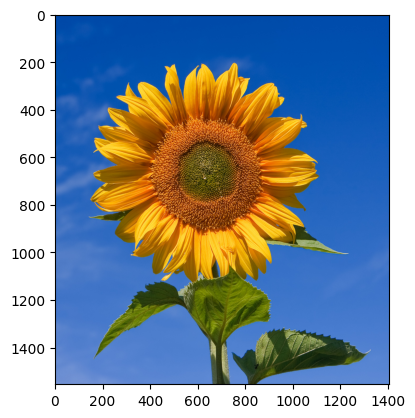

In [44]:
img = plt.imread('/content/Sunflower.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 66ms/step


array([82])

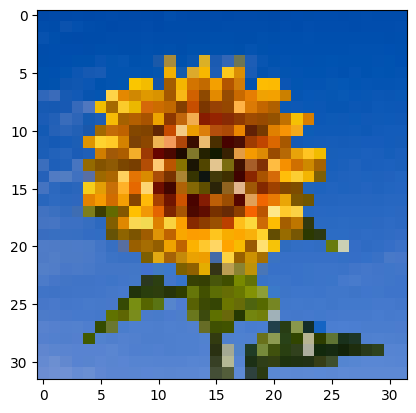

In [46]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img 
img = load_img('/content/Sunflower.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)